# Sentiment Analysis on User- Generated Tweets
#### By Gokul Ghate

- Sentiment Analysis is key to practice social listening on social media platforms. Listening is the practice of actively receiving and interpreting messages in a conversation, verbal or written. In social media, it applies the same way. Brands can now actively listen and monitor how customers perceive a new product, services, or features development.


- In machine learning, sentiment analysis is a natural language processing (NLP) technique that can measure polarity within a text in a range of positive, neutral, and negative. It can also provide a subjectivity score to evaluate personal opinions

### Why use Twitter datasets for Sentiment Analysis?
1)  Measuring logical and emotional responses. Sentiment analysis can provide an in-depth understanding at a large scale of tangible and intangible opinions and responses evaluating people’s states of mind.


2) Highlights what issues matter to the customer. By utilizing sentiment analysis in social media such a Twitter, brands can specifically address underlying sentiments from the customer perspective and figure out how to handle them, and improve decision-making processes.  

   - Sentiment analysis use cases range from the stock exchange, banking, and finance to retail and political campaigns. This makes PR, marketing, and customer relations easier and more assertive.

     - For Example: 
      - OnePlus famously used sentiment analysis to detect what their consumers discussed in their new smartphone <b> OnePlus6 launch </b>. 
      - Academic Papers have been developed around sentiment analysis of Twitter data, such as in the <b> 2012 U.S. Presidential Election Cycle </b>. 

## Importing dependencies

In [42]:
import tensorflow as tf #deep learning library that uses neural network behind it
from wordcloud import WordCloud # for data visualization
import matplotlib.pyplot as plt # for interactive visualizations
import pandas as pd
import numpy as np


import nltk #text-preprocessing unstructured data containing human readable texts
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.8.0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Dataset Preprocessing

#### The dataset being used here is Sentiment-140. It contains a labels data of 1.6M Tweets and I find it a good amount of data to train a model.

In [43]:
df = pd.read_csv('C:/Users/gokul/Desktop/Internship summer`22/Projects_on_github/Sentiment Analysis on user-generated tweets/archive(1)/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


- The columns are without any proper names. Renaming them to give them a reference:

In [44]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


- I am using only text to clasify its sentiment. Removing other columns.

In [45]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [46]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


- Decoding the labels. Mapping <b>0 -> Negative and 1 -> Positive</b>. Following this we will analyse the dataset by its distribution because it is important that we have small amount of examples for given classes. 

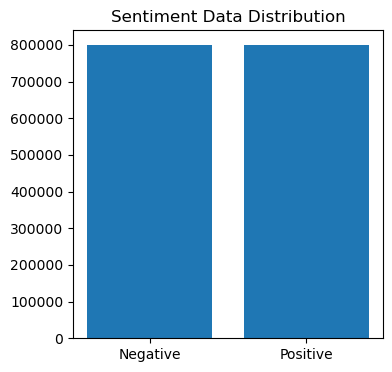

In [93]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(4,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")
plt.show()

- We can see that the dataset is without any skewness.

#### Data Exploration

In [48]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,sentiment,text
643864,Negative,@selenagomez respond to your fans more
1127003,Positive,so glad the day is over ! excited for tonight
584731,Negative,How does it feel to repatriate your lover back...
1243807,Positive,listening to mws the first decade. memories of...
917274,Positive,@pranaydewan thanku cooking is simple but the...
1288089,Positive,@Cannon007 Very true The only thing worse was...
1125909,Positive,@phinnia it's so rofltastic and ridiculous. w...
604766,Negative,@tyrone yes i now mhhhhhhhhhh i wi...
866687,Positive,@ArsenalSarah @Ndnbluez Enjoy our coffee &amp...
794450,Negative,@KhloeKardashian unfortch I'm workin in ICU to...


- We have to take out irregularities from the text. The punctuations used has no contextual meaning and adds no value to the feature for model training.

#### Text Preprocessing

- Tweet texts often consists of other user mentions, hyperlink texts, emoticons and punctuations. In order to use them for learning using a Language Model, we cannot permit those texts for training a model. So we have to clean the text data using various preprocessing and cleansing methods. 

#### Stemming / Lemmatization

- For grammatical reasons, documents are going to use different forms of a word, such as write, writing and writes. Additionally, there are families of derivationally related words with similar meanings. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

- Stemming usually refers to a process that chops off the ends of words in the hope of achieving goal correctly most of the time and often includes the removal of derivational affixes. 

- Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base and dictionary form of a word 

#### Hyperlinks and Mentions

- Twitter is a social media platform where people can tag and mentions other people's ID and share videos and blogs from internet. So the tweets often contain lots of Hyperlinks and twitter mentions. 

- For example: 
  - Twitter User Mentions - Eg. @arunrk7, @andrewng
  - Hyperlinks - Eg. https://keras.io, https://tensorflow.org


#### Stopwords

- Stopwords are commonly used words in English which have no contextual meaning in an sentence. So therefore we remove them before classification. Some stopwords are... 

- 'i', 'our', 'yours', 'his', 'herself', 'them', 'which', 'these', 'was', 'have', 'does', 'could', 'she's' etc..

#### NLTK is a python library which has functions to perform text processing task for NLP.

In [49]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [50]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [51]:
df.text = df.text.apply(lambda x: preprocess(x))

#### Positive Words

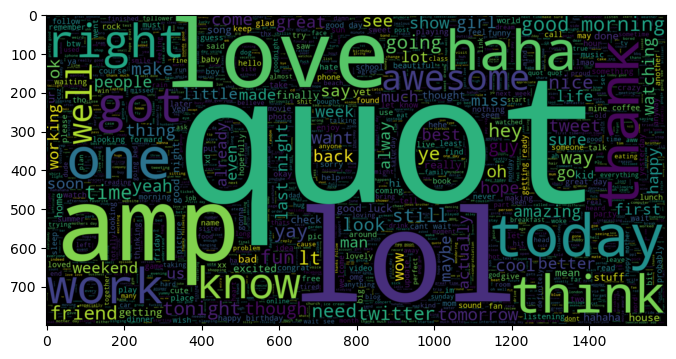

In [94]:
plt.figure(figsize = (8,8)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

#### Negative Words

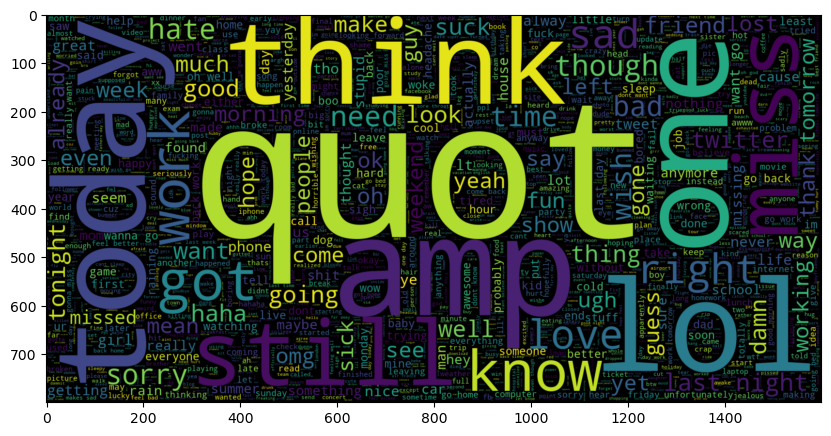

In [95]:
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.show()

#### Train and Test split

In [56]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [58]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


- Using train_test_split to shuffle the dataset and split it into training and testing dataset. It's important to shuffle our dataset before training.

In [60]:
train_data.head(10)

,sentiment,text
23786,Negative,need friends
182699,Negative,im trying call impossible
476661,Negative,good pace going 3k 13 min missed 5k turn ended...
1181490,Positive,u gonna shows ny soon luv see u live
878773,Positive,hell yea get em tattoos ink free wish parents ...
130866,Negative,yeah need 2 see ur mom calls back first rememb...
1235876,Positive,sounds like cup tea sign
717314,Negative,tired want sleep wtf
969880,Positive,amazing wish
748698,Negative,thank god wkrn abc affiliate nashville back mi...


#### Tokenization

- Tokenization is the task of chopping it up into pieces, called tokens, perhaps at the same time throwing away certain characters, such as punctuation.

  - tokenizer - create tokens for every word in the data corpus and map them to a index using dictionary 
  
  - word_index - contains the index for each word
   
  - vocab_size - represents the total number of word in the data corpus
  

In [62]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Using TensorFlow Backend")
print("Vocabulary Size :", vocab_size)

Using TensorFlow Backend
Vocabulary Size : 290575


- We now have a tokenizer object, which can be used to covert any word into a Key in dictionary (number).


- Now we are going to build a Sequence Model. A sequence of numbers has to be fed in it. 


- We also have to ensure there is no variance in input shapes of sequences. It all should be of same length but text in tweets have different count of words in it. To avoid this, we will use pad_sequence. It will make all the sequence in one constant length MAX_SEQUENCE_LENGTH.

In [63]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [64]:
labels = train_data.sentiment.unique().tolist()

#### Label Encoding

- We are building the model to predict class in enocoded form (0 or 1 as this is a binary classification). We should encode our training labels to encodings.

In [65]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


### Word Embedding
- In Language Model, words are represented in a way to intend more meaning and for learning the patterns and contextual meaning behind it.

- <b> Word Embedding </b> is one of the popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.



- Basically, it's a feature vector representation of words which are used for other natural language processing applications.



- Going in the path of Computer Vision, we use Transfer Learning. We download the pre-trained embedding and use it in our model.



- The pretrained Word Embedding like GloVe & Word2Vec gives more insights for a word which can be used for classification.

In [66]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [75]:
GLOVE_EMB = 'C:/Users/gokul/Desktop/Internship summer`22/Projects_on_github/Sentiment Analysis on user-generated tweets/glove.6B/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = 'C:/Users/gokul/Desktop/Internship summer`22/Projects_on_github/Sentiment Analysis on user-generated tweets/best_model.hdf5'

In [77]:
embeddings_index = {}

f = open(GLOVE_EMB, encoding="utf8")
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [78]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [79]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

## Model Training - LSTM

- We are ready to build our Deep Learning Model.
- Few things to keep in mind while developing a DL model:
  - Model Architecture
  - Hyperparameter Tuning
  - Performance of the Model

- Reason why we are using Sequence Models rather than Naive Bayes or SVD?
  - Earlier, we saw in wordcloud, that some words are featured in both 'Positive' and 'Negative' tweets. This could be a problem while using otehr models.

- Reccurent Neural Networks can handle a seqence of data and learn a pattern of input seqence to give either sequence or scalar value as output. In our case, the Neural Network outputs a scalar value prediction.

- For model architecture, we use

1) <b> Embedding Layer </b> - Generates Embedding Vector for each input sequence.

2) <b> Conv1D Layer </b> - Its using to convolve data into smaller feature vectors.

3) <b> LSTM </b> - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

4) <b> Dense </b> - Fully Connected Layers for classification

In [81]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [82]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

### Optimization Algorithm

- This notebook uses Adam, optimization algorithm for Gradient Descent.

#### Callbacks

- Callbacks are special functions which are called at the end of an epoch. We can use any functions to perform specific operation after each epoch. I used two callbacks here,

  - LRScheduler - It changes a Learning Rate at specfic epoch to achieve more improved result. In this notebook, the learning rate exponentionally decreases after remaining same for first 10 Epoch.

  - ModelCheckPoint - It saves best model while training based on some metrics. Here, it saves the model with minimum Validity Loss.


In [83]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [91]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [89]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on CPU...


In [92]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 2117s 2s/step - loss: 0.5197 - accuracy: 0.7387 - val_loss: 0.4821 - val_accuracy: 0.7659 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 1698s 1s/step - loss: 0.4880 - accuracy: 0.7618 - val_loss: 0.4728 - val_accuracy: 0.7730 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 1528s 1s/step - loss: 0.4776 - accuracy: 0.7688 - val_loss: 0.4680 - val_accuracy: 0.7762 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 1520s 1s/step - loss: 0.4714 - accuracy: 0.7728 - val_loss: 0.4643 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 1772s 1s/step - loss: 0.4670 - accuracy: 0.7756 - val_loss: 0.4625 - val_accuracy: 0.7783 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 1840s 1s/step - loss: 0.4636 - accuracy: 0.7775 - val_loss: 0.4600 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 7/10
1250/1250 [========================

## Model Evaluation


- Evaluating the performance of the model. We will use some evaluation metrics and techniques to test the model.

- Starting with the Learning Curve of loss and accuracy of the model on each epoch.
  - An epoch means training the neural network with all the training data for one cycle.  In an epoch, we use all of the data exactly once.

In [96]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

- The model will predict a score between 0 and 1. We can classify 2 classes by setting a threshold value for it. In this case, I have set it to 0.5 as the THRESHOLD value. If the score is above 0.5, it will be classified as the <b> POSITIVE </b> sentiment.

In [97]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 74s 2s/step


## Confusion Matrix

- a summary of prediction results on a classification problem
- The number of correct and incorrect predictions are summarized with count values and broken down by each class.

In [98]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

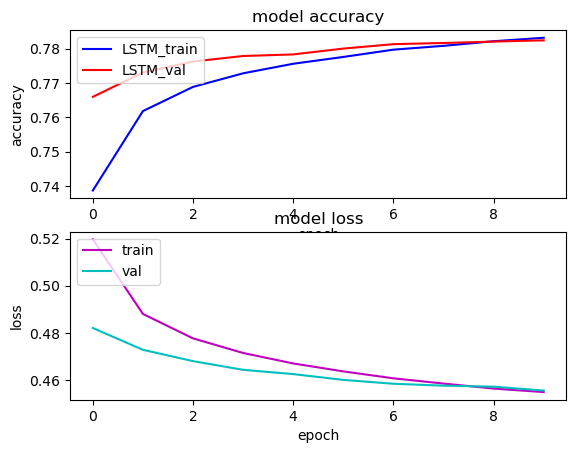

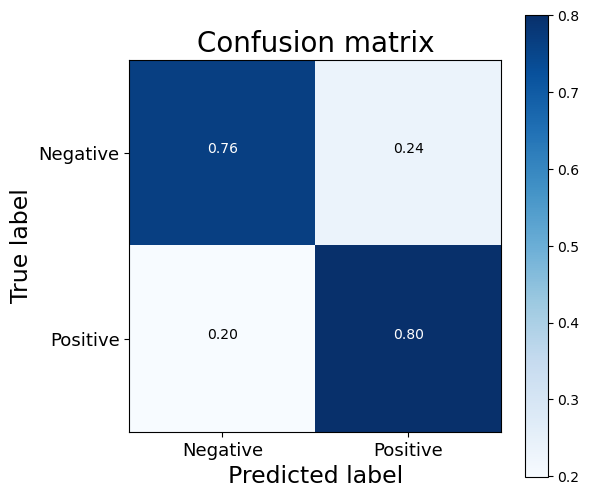

In [99]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

#### Classification Scores

In [100]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.79      0.76      0.78    160542
    Positive       0.77      0.80      0.79    159458

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

